# • DOMAIN: Smartphone, Electronics

• CONTEXT: 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.


# • DATA DESCRIPTION:

• author : name of the person who gave the rating

• country : country the person who gave the rating belongs to

• data : date of the rating

• domain: website from which the rating was taken from

• extract: rating content

• language: language in which the rating was given

• product: name of the product/mobile phone for which the rating was given

• score: average rating for the phone

• score_max: highest rating given for the phone

• source: source from where the rating was taken

    


# Import the necessary libraries and read the provided CSVs as a data frame

In [672]:
#Import Library Files
import pandas as pd
import numpy as np
import seaborn as sns
#Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

# Import the necessary libraries for SVD 
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy



In [673]:
#Read first dataset
df_phone_user_review_1 = pd.read_csv('phone_user_review_file_1.csv',encoding='latin-1')
df_phone_user_review_1.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [674]:
#Size of first dataframe
df_phone_user_review_1.shape

(374910, 11)

In [675]:
#Read second dataset
df_phone_user_review_2 = pd.read_csv('phone_user_review_file_2.csv',encoding='latin-1')
df_phone_user_review_2.head(5)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [676]:
#Size of second dataframe
df_phone_user_review_2.shape

(114925, 11)

In [677]:
#Read Third dataset
df_phone_user_review_3 = pd.read_csv('phone_user_review_file_3.csv',encoding='latin-1')
df_phone_user_review_3.head(5)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [678]:
#Size of Third dataframe
df_phone_user_review_3.shape

(312961, 11)

In [679]:
#Read fourth dataset
df_phone_user_review_4 = pd.read_csv('phone_user_review_file_4.csv',encoding='latin-1')
df_phone_user_review_4.head(5)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [680]:
#Size of Fourth dataframe
df_phone_user_review_4.shape

(98284, 11)

In [681]:
#Read fifth dataset
df_phone_user_review_5 = pd.read_csv('phone_user_review_file_5.csv',encoding='latin-1')
df_phone_user_review_5.head(5)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [682]:
#Size of Fifth dataframe
df_phone_user_review_5.shape

(350216, 11)

In [683]:
#Read sixth dataset
df_phone_user_review_6 = pd.read_csv('phone_user_review_file_6.csv',encoding='latin-1')
df_phone_user_review_6.head(5)


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [684]:
#Size of sixth dataframe
df_phone_user_review_6.shape

(163837, 11)

# Merge the provided CSVs into one data-frame.
# Check a few observations and shape of the data-frame.

In [685]:
mobile_rating = [df_phone_user_review_1,df_phone_user_review_2,df_phone_user_review_3,df_phone_user_review_4,df_phone_user_review_5,df_phone_user_review_6]
df_mobile_rating = pd.concat(mobile_rating, ignore_index=True)
df_mobile_rating.shape


(1415133, 11)

In [686]:
df_mobile_rating.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [687]:
df_mobile_rating.describe().T


,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [688]:
#Check Data type in df_mobile_rating
df_mobile_rating.dtypes


phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [689]:
#Copy current data frame to a temporary dataframe df_mobile_rate to keep current dataframe intact.
df_mobile_rate = df_mobile_rating.copy()
df_mobile_rate.shape


(1415133, 11)

# Round off scores to the nearest integers.

# Check for missing values. Impute the missing values if there is any.

In [690]:
df_mobile_rate.isna().sum()


phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [691]:
# 1d. Check for missing values. Impute the missing values if there is any. 
# filling the null values in column 'score' and 'score_max' 
df_mobile_rate = df_mobile_rate.fillna(df_mobile_rate.median())

# dropping the null values in columns 'extract' ,'author' and 'product'
df_mobile_rate = df_mobile_rate.dropna()
df_mobile_rate.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [692]:
# 1c. Round oﬀ scores to the nearest integers. 
df_mobile_rate['score'] = round(df_mobile_rate['score']).astype(int) 
df_mobile_rate['score_max'] =round(df_mobile_rate['score_max']).astype(int) 

In [693]:
df_mobile_rate.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [694]:
#Check Data type in df_mobile_rate
df_mobile_rate.dtypes

phone_url    object
date         object
lang         object
country      object
source       object
domain       object
score         int32
score_max     int32
extract      object
author       object
product      object
dtype: object

In [695]:
df_mobile_rate.isna().sum()


phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [696]:
df_mobile_rate.shape


(1336416, 11)

# Check for duplicate values and remove them if there is any.

In [697]:
df_mobile_rate = df_mobile_rate.drop_duplicates()

df_mobile_rate


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10,10,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10,10,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6,10,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9,10,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4,10,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
...,...,...,...,...,...,...,...,...,...,...,...
1415128,/cellphones/alcatel-ot-club_1187/,5/12/2000,de,de,Ciao,ciao.de,2,10,Weil mein Onkel bei ALcatel arbeitet habe ich ...,david.paul,Alcatel Club Plus Handy
1415129,/cellphones/alcatel-ot-club_1187/,5/11/2000,de,de,Ciao,ciao.de,10,10,Hy Liebe Leserinnen und Leser!! Ich habe seit ...,Christiane14,Alcatel Club Plus Handy
1415130,/cellphones/alcatel-ot-club_1187/,5/4/2000,de,de,Ciao,ciao.de,2,10,"Jetzt hat wohl Alcatell gedacht ,sie machen wa...",michaelawr,Alcatel Club Plus Handy
1415131,/cellphones/alcatel-ot-club_1187/,5/1/2000,de,de,Ciao,ciao.de,8,10,Ich bin seit 2 Jahren (stolzer) Besitzer eines...,claudia0815,Alcatel Club Plus Handy


# Drop irrelevant features. Keep features like Author, Product, and Score. 

In [698]:

df_mobile_rate.drop(['phone_url','date','lang','country','source','domain','score_max','extract'], axis = 1, inplace = True)

In [699]:
df_mobile_rate.shape


(1331593, 3)

In [700]:
df_mobile_rate.head()

,score,author,product
0,10,CarolAnn35,Samsung Galaxy S8
1,10,james0923,Samsung Galaxy S8
2,6,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4,S Ate Mine,Samsung Galaxy S8


# Keep only 1000000 data samples. Use random state=612.

In [701]:
df_mobile = df_mobile_rate.sample(n=1000000, random_state=612)
df_mobile.shape


(1000000, 3)

In [702]:
df_mobile.head()


,score,author,product
8765,10,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint)
233365,10,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...
145859,10,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB
1203260,8,katha_maria93,Sony Ericsson W395 blush titanium Handy
1205666,2,paul george,Apple iPhone 3G 8GB SIM-Free - Black


In [703]:
df_mobile_final = df_mobile[['author','product','score']]
df_mobile_final.head()


,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
145859,ron,×××¤×× ×¡××××¨× Huawei Mate S 32GB,10
1203260,katha_maria93,Sony Ericsson W395 blush titanium Handy,8
1205666,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2


# Identify the most rated features.

In [704]:
#sorting on products that got highest mean score

df_mobile_final.groupby('product')['score'].mean().sort_values(ascending=False).head()  

product
Nokia Lumia 920 (yellow)                                                                                                10.0
Kit Me Out FR - Samsung Galaxy Ace S5830 & S5839i Android Housse / Coque / Ãtui de Protection en TPU Gel GivrÃ©...     10.0
Smartphone Samsung Galaxy Ace 4 Lite Duos Dual Chip Desbloqueado Android 4.4 Tela 4 4GB 3G Wi-Fi CÃ¢mera 3MP - Preto    10.0
Kit Me Out FR - Samsung Galaxy S3 Mini i8190 III Android Housse / Coque / Ãtui de Protection en Gel TPU Papillon...    10.0
Smartphone Samsung Galaxy Ace 4 Lite Duos 4GB G313ML                                                                    10.0
Name: score, dtype: float64

# Identify the users with most number of reviews.

In [705]:
(df_mobile_final['author'].value_counts()).head()


Amazon Customer    57801
Cliente Amazon     14656
e-bit               6260
Client d'Amazon     5715
Amazon Kunde        3563
Name: author, dtype: int64

In [706]:
# The product that got most number of reviews.

df_mobile_final['product'].value_counts().head()


Lenovo Vibe K4 Note (White,16GB)     3913
Lenovo Vibe K4 Note (Black, 16GB)    3228
OnePlus 3 (Graphite, 64 GB)          3127
OnePlus 3 (Soft Gold, 64 GB)         2643
Huawei P8lite zwart / 16 GB          1994
Name: product, dtype: int64

# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [707]:
# extracting authors who gave greater than 50 ratings
df1 = pd.DataFrame(columns=['author', 'a_count'])
df1['author']=df_mobile_final['author'].value_counts().index.tolist() 
df1['a_count'] = list(df_mobile_final['author'].value_counts() > 50)


In [708]:
# get names of indexes for which count column value is False
index_names = df1[ df1['a_count'] == False ].index 
# drop these row indexes from dataFrame 
df1.drop(index_names, inplace = True) 
df1


,author,a_count
0,Amazon Customer,True
1,Cliente Amazon,True
2,e-bit,True
3,Client d'Amazon,True
4,Amazon Kunde,True
...,...,...
685,Al,True
686,vesponethebest,True
687,Sandro,True
688,Federica,True


In [709]:
# extracting product that got more than 50 ratings
df2 = pd.DataFrame(columns=['product', 'p_count'])
df2['product']=df_mobile_final['product'].value_counts().index.tolist() 
df2['p_count'] = list(df_mobile_final['product'].value_counts() > 50)


In [710]:
# get names of indexes for which count column value is False
index_names = df2[ df2['p_count'] == False ].index 
# drop these row indexes from dataFrame 
df2.drop(index_names, inplace = True)


In [711]:
df2

,product,p_count
0,"Lenovo Vibe K4 Note (White,16GB)",True
1,"Lenovo Vibe K4 Note (Black, 16GB)",True
2,"OnePlus 3 (Graphite, 64 GB)",True
3,"OnePlus 3 (Soft Gold, 64 GB)",True
4,Huawei P8lite zwart / 16 GB,True
...,...,...
4371,Samsung Galaxy Core Prime SM-G360F 4G (Silver),True
4372,Samsung S5260 Star II,True
4373,"BLU Dash Music II Android 4.4 KK, 3.2MP/VGA - ...",True
4374,Blackview BV6000 4G Smartphone FDD-LTE Tri-Bew...,True


In [712]:
# selecting data rows where product is having more than 50 ratings.  
df3 = df_mobile_final[df_mobile_final['product'].isin(df2['product'])] 
df3


,author,product,score
8765,Kdotj15,Samsung Galaxy S7 edge 32GB (Sprint),10
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
28860,stephensca,Samsung Galaxy S7 32GB (Verizon),10
673776,martinsa,Sony Xperia Z C6603,8
687804,MoneyMike,Samsung Galaxy S4 16GB (T-Mobile),10
...,...,...,...
97624,R2D2bro,Samsung Galaxy S6 32GB (AT&T),9
1138374,RACHITO2006,Nokia 5800,4
351525,irene,"Samsung G900 Galaxy S5 Smartphone, 16 GB, Nero...",10
1161149,anaid96,Sony Ericsson Aino,10


In [713]:
# selecting data rows from df3 where author has given more than 50 ratings.
# 2c. so that we get the data with products having more than 50 ratings and users who have given more than 50 ratings
df4 = df3[df3['author'].isin(df1['author'])]
df4


,author,product,score
233365,Cliente Amazon,Asus ZE551ML-2A760WW Smartphone ZenFone 2 Delu...,10
537487,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2
518771,einem Kunden,"ZTE Blade A452 Smartphone, 12,7 cm (5 Zoll) Di...",10
353663,Client d'Amazon,Aukru Chargeur de batterie adaptateur Pour Sam...,8
224123,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 16GB)",8
...,...,...,...
177801,Cliente Amazon,"Huawei P8 lite Smartphone, Display 5.0"" IPS, D...",10
505475,Amazon Customer,Nokia Lumia 635 8GB Unlocked GSM 4G LTE Window...,10
1170634,Capyto,Samsung M150 Cep Telefonu,9
577011,Gustavo,Huawei Ascend Y330 - Smartphone libre Android ...,6


In [714]:
# 2c. Report the shape of the final dataset.
df4.shape


(109237, 3)

# Build a popularity based model and recommend top 5 mobile phones.

In [715]:
#calculating the mean score for a product by grouping it.
ratings_mean_count = pd.DataFrame(df_mobile_final.groupby('product')['score'].mean()) 


In [716]:
# calculating the number of ratings a product got
ratings_mean_count['rating_counts'] = pd.DataFrame(df_mobile_final.groupby('product')['score'].count())  

In [717]:
# 3. Recommending the 5 mobile phones based in highest mean score and highest number of ratings the product got. 
ratings_mean_count.sort_values(by=['score','rating_counts'], ascending=[False,False]).head(5)


,score,rating_counts
product,,
Samsung Galaxy Note5,10.0,144
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,140
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,135
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,128
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,126


# Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model

In [718]:
#If installed comment it otherwise uncomment and run the command.
#!pip install scikit-surprise


In [719]:
reader = Reader(rating_scale=(1, 10))


In [720]:
df_mobile_sample = df_mobile_final.sample(n=5000,random_state=42)


In [721]:
df_mobile_sample.shape

(5000, 3)

In [722]:
data = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)


In [723]:
data.df

,author,product,score
712461,buhau,"Samsung Galaxy S4 Active (i9295), harmaa",6
883088,Jimmy Bodnar,Apple iPhone 4S 64GB (White) - Factory Unlocked,10
1298140,JMcCarthy90,LG Revolution VS910 (Verizon Wireless),1
194277,Bell,"BlackBerry PRIV Factory Unlocked Smartphone, U...",10
1225831,zehrabalta,Nokia N93 Cep Telefonu,9
...,...,...,...
322310,Terence Ronald Males,Sony Xperia XA Ultra SIM-Free Smartphone - Lim...,10
735573,Enrico Zerilli,"Sony C5303 Xperia SP Smartphone, Fotocamera da...",6
636651,Richard Newquist,BLU Studio 6.0 HD Smartphone - GSM Unlocked - ...,10
682457,Carlos,Sony Xperia M Dual-Sim - Smartphone (pantalla ...,10


In [724]:
#Apply SVD


In [725]:
svd_model = SVD ()

X, y = train_test_split(data,test_size=0.25,random_state=42)


In [726]:
svd_model.fit(X)


In [727]:
y_pred = svd_model.test(y)
accuracy.rmse(y_pred)


RMSE: 2.5355


2.535506998934862

In [728]:
y_pred

[Prediction(uid='c19591959', iid='Samsung S5260 Star II', r_ui=8.0, est=8.0264, details={'was_impossible': False}),
 Prediction(uid='Gilby', iid='JCB Toughphone Pro-Talk TP851 Sim Free Mobile Phone(This phone is not compatible with 3G Network Sim)', r_ui=2.0, est=8.0264, details={'was_impossible': False}),
 Prediction(uid='Daniela', iid='LG Smartphone LG G4 Dual Chip 4G Android 5.0 - CÃ¢m. 16MP + Frontal 8MP Tela 5.5" Proc. Hexa Core', r_ui=10.0, est=8.02241045974958, details={'was_impossible': False}),
 Prediction(uid='peachE', iid='Samsung E700', r_ui=6.0, est=8.0264, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)', r_ui=10.0, est=5.964437144221805, details={'was_impossible': False}),
 Prediction(uid='joaquinillo ', iid='LG L35 D150', r_ui=8.0, est=8.0264, details={'was_impossible': False}),
 Prediction(uid='Vishnu', iid='Motorola Moto G Turbo (White, 16GB)', r_ui=6.0, est=7.963201973539861, details={'was_impo

In [729]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred])


In [730]:
test_pred_df.head()


,0,1,2
0,c19591959,Samsung S5260 Star II,8.026400
1,Gilby,JCB Toughphone Pro-Talk TP851 Sim Free Mobile ...,8.026400
2,Daniela,LG Smartphone LG G4 Dual Chip 4G Android 5.0 -...,8.022410
3,peachE,Samsung E700,8.026400
4,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",5.964437


# Build a collaborative filtering model using kNNWithMeans from surprise.

In [731]:
# Import the necessary library for KNNWithMeans
from surprise import KNNWithMeans
from surprise import Prediction


In [732]:
# User Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

knn_model_user.fit(X)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [733]:
# Item Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

knn_model_item.fit(X)


Computing the cosine similarity matrix...
Done computing similarity matrix.


# Evaluate the collaborative model. Print RMSE value.

In [734]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)


In [735]:
print("User-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_user)


User-based Model : Accuracy RMSE)
RMSE: 2.5397


2.539662371960687

In [736]:
print("Item-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_item)


Item-based Model : Accuracy RMSE)
RMSE: 2.5496


2.5496014746539797

In [737]:
# User based model test prediction output
test_pred_user_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_user])
test_pred_user_df.head(5)


,0,1,2
0,c19591959,Samsung S5260 Star II,8.0264
1,Gilby,JCB Toughphone Pro-Talk TP851 Sim Free Mobile ...,8.0264
2,Daniela,LG Smartphone LG G4 Dual Chip 4G Android 5.0 -...,8.0264
3,peachE,Samsung E700,8.0264
4,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",6.0000


In [738]:
# Item based model test prediction output
test_pred_item_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_item])
test_pred_item_df.head(5)


,0,1,2
0,c19591959,Samsung S5260 Star II,8.026400
1,Gilby,JCB Toughphone Pro-Talk TP851 Sim Free Mobile ...,8.026400
2,Daniela,LG Smartphone LG G4 Dual Chip 4G Android 5.0 -...,8.026400
3,peachE,Samsung E700,8.026400
4,Amazon Customer,"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",5.977333


# Predict score (average rating) for test users.

In [739]:
# Predict score for one sample test user
knn_model_user.predict(uid="c19591959",iid="Samsung S5260 Star II")


Prediction(uid='c19591959', iid='Samsung S5260 Star II', r_ui=None, est=8.0264, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [740]:
# Predicted value for all test users
y_pred_user


[Prediction(uid='c19591959', iid='Samsung S5260 Star II', r_ui=8.0, est=8.0264, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Gilby', iid='JCB Toughphone Pro-Talk TP851 Sim Free Mobile Phone(This phone is not compatible with 3G Network Sim)', r_ui=2.0, est=8.0264, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Daniela', iid='LG Smartphone LG G4 Dual Chip 4G Android 5.0 - CÃ¢m. 16MP + Frontal 8MP Tela 5.5" Proc. Hexa Core', r_ui=10.0, est=8.0264, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='peachE', iid='Samsung E700', r_ui=6.0, est=8.0264, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Amazon Customer', iid='Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)', r_ui=10.0, est=6.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='joaquinillo ', iid='LG L35 D150', r_ui=8.0, est=8.0264, d

# Report your findings and inferences.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score', ylabel='count'>

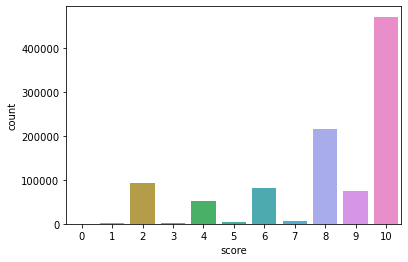

In [741]:
sns.countplot(df_mobile_final['score'])


 Conclusion 
* Most of the users provided rating on higher end
* Collbarative Filtering Model can be used to provide recommendations to the users
 

# Try and recommend top 5 products for test users.

In [742]:
df_pred = pd.DataFrame(y_pred_user)


In [743]:
# function that takes in user and number of recommendations as an input and returns the recommended products
def recommendations(user, n):
    
    recommended_products = df_pred [df_pred['uid'] == user][['uid','iid','est']].sort_values('est', ascending=False).head(n)
  
    return recommended_products


In [744]:
# Recommend top 5 products
recommendations('Amazon Customer',5)


,uid,iid,est
1111,Amazon Customer,"Apple iPhone 6s (Rose Gold, 16GB)",10.000000
899,Amazon Customer,LEAGOO EASYSMX Leagoo Lead 6 Smart Phone Andro...,10.000000
714,Amazon Customer,"Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, ...",8.543103
735,Amazon Customer,"Apple iPhone 6 (Silver, 64GB)",8.543103
1151,Amazon Customer,"Asus Zenfone Max ZC550KL-6A068IN (Black, 2GB, ...",8.543103


In [745]:
recommendations('Cliente Amazon',5)


,uid,iid,est
54,Cliente Amazon,"Asus ZenFone 2 Laser Smartphone da 32 GB, Dual...",10.0000
18,Cliente Amazon,Samsung I9105P Galaxy S II Plus DualCore - Sma...,8.0264
769,Cliente Amazon,"HTC One A9, 32GB Unlocked GSM Opal Silver",8.0264
1085,Cliente Amazon,thl 5.0'' THL 2015A Android 5.1 MT6735 Quad Co...,8.0264
962,Cliente Amazon,"Huawei Ascend G620s Smartphone, 8 GB, Nero",8.0264


In [746]:
recommendations('e-bit',5)


,uid,iid,est
352,e-bit,Samsung Galaxy J1 Mini SM-J105,10.0000
98,e-bit,Smartphone Samsung Galaxy S4 Mini GT-I9192,9.6500
101,e-bit,Samsung Galaxy A5 SM-A510M,8.0264
322,e-bit,Smartphone Samsung Galaxy J1 SM-J120H,8.0264
1190,e-bit,Smartphone Asus ZenFone 2 ZE551ML 16GB Z3560,8.0264


In [747]:
#Check for outliers and impute them as required

<AxesSubplot:>

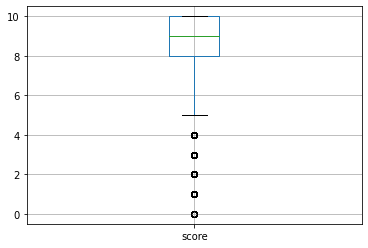

In [748]:
df_mobile_final.boxplot()


In [749]:
Q1 = np.percentile(df_mobile_final['score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df_mobile_final['score'], 75, interpolation = 'midpoint') 
Q1, Q3


(8.0, 10.0)

In [750]:
IQR = Q3 - Q1
max_range = Q3 + (IQR * 1.5)
min_range = Q1 - (IQR * 1.5)
min_range, max_range


(5.0, 13.0)

In [751]:
df_mobile_final[df_mobile_final['score'] > 13]


,author,product,score


In [752]:
df_mobile_final[df_mobile_final['score'] < 5]

,author,product,score
1205666,paul george,Apple iPhone 3G 8GB SIM-Free - Black,2
1400450,Karniban,Nokia 5110,4
537487,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",2
1161159,Beul,"Sony Ericsson Aino Classic Edition Handy (7,6c...",4
483755,Marcus D.,CUBOT X12 5.0'' IPS Android 5.1 Unlocked LTE 4...,4
...,...,...,...
23086,Amazon Customer,"Apple iPhone 6s Plus (Silver, 16GB)",2
102484,Amazon Customer,Samsung Galaxy S6 SM-G920F 32GB (FACTORY UNLOC...,2
382184,MRosa,"SONY XPERIA Z3 D6603 LTE 16GB 5.2"" GSM Unlocke...",2
927554,joerg,"Huawei Sonic U8650 Smartphone (8,8 cm (3,5 Zol...",2


In [753]:
df_mobile_new = df_mobile_final.copy()
df_mobile_new.loc[df_mobile_new['score'] < 5.0, 'score'] = 5.0


<AxesSubplot:>

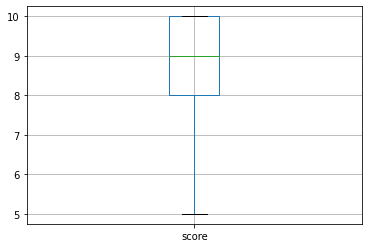

In [754]:
df_mobile_new.boxplot()


In [755]:
df_mobile_new_sample = df_mobile_new.sample(n=5000,random_state=42)


In [756]:
data_new = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)


In [757]:
svd_model_new = SVD ()

X_train, y_test = train_test_split(data_new,test_size=0.25,random_state=42)


In [758]:
svd_model_new.fit(X_train)


In [759]:
y_pred_new = svd_model_new.test(y_test)
accuracy.rmse(y_pred_new)


RMSE: 2.5321


2.532128920990658

# Try cross validation techniques to get better results.

In [760]:
cross_validate(svd_model_new, data_new, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5950  2.5472  2.6317  2.5273  2.4709  2.5544  0.0555  
MAE (testset)     1.9771  1.9938  2.0307  1.9525  1.9324  1.9773  0.0339  
Fit time          0.17    0.17    0.17    0.18    0.17    0.17    0.00    
Test time         0.00    0.00    0.00    0.08    0.00    0.02    0.03    


{'test_rmse': array([2.59498002, 2.54722046, 2.63173734, 2.52727566, 2.47090008]),
 'test_mae': array([1.97709412, 1.99381734, 2.03069961, 1.95252055, 1.93241932]),
 'fit_time': (0.17454123497009277,
  0.17250490188598633,
  0.17453312873840332,
  0.1765282154083252,
  0.17450308799743652),
 'test_time': (0.003981828689575195,
  0.004987239837646484,
  0.003989219665527344,
  0.0818173885345459,
  0.004019975662231445)}


* The lower the MAE and RMSE, the more accurately the recommendation engine predicts user ratings
  Report your findings and inferences.
  
* Samsung Galaxy Note5 is the most popular product Amazon Customer is the most active author who writes reviews.
* CV rmse was 2.5


# In what business scenario you should use popularity based Recommendation Systems ?

* Popularity based recommendation system works with the trend. 
 It basically uses the items which are in trend right now. For example,
 if any product which is usually bought by every new user then there are chances 
 that it may suggest that item to the user who just signed up.

* If we are not having user historical data then we will go for popularity based recommendation systems

* We can use this recommendation on first day of the business based on certain filtering conditions

* Popularity based recommendation system relies on the popularity,
 trends and frequency counts of which items were most purchased.It is used buy
 the travel companies selling holiday packages in a season,
 by Google News and other news websites to show Top Stories with images.

* Example, In shopping store we can suggest popular dresses by purchase count.

* Trending News or Movies.

# In what business scenario you should use CF based Recommendation Systems ?

* Collaborative filtering is a recommendation system that creates a prediction based on a user’s previous behaviors.

* Collaborative filtering focuses on relationships between the item and users; items’ 
    similarity is determined by their rating given by customers who rated both the items.

* You can use this technique to build recommenders that give suggestions to a user on 
   the basis of the likes and dislikes of similar users.

* If there is a similarity betweeen different users and items

* Mostly used in e-commerce website and OTT platforms

* It is a personalised recommender system , recommendations are made based on the past behaviour of the user

* Example1: If you plan to watch a new movie, you will generally ask your friends and seek their recommendations.
  This is based on the premise that users trust their friends as they are confident that their friends know their                 taste in movies.Therefore, we usually follow and watch whatever is recommended by a good friend who has a similar               taste.

* Example 2 :Most websites like Amazon, YouTube, and Netflix use collaborative filtering as a part of their sophisticated recommendation systems.


# What other possible methods can you think of which can further improve the recommendation for different users ?

 Apart from Popularity and Collaborative Filtering we can use below recommendation methods :

*  Content Based Recommendation system
*  Classification Model based
*  Hybrid Approaches
*  Association Rule Mining